# Decison Trees
Primeiro, carregaremos alguns dados falsos sobre contratações anteriores que inventei. Observe como usamos o pandas para converter um arquivo csv em um DataFrame:

In [1]:
import numpy as np  # Importa o NumPy, uma biblioteca poderosa para computação científica com Python, mas ainda não está sendo usada nesse código.
import pandas as pd  # Importa o pandas, uma biblioteca para manipulação e análise de dados.

from sklearn import tree  # Importa o módulo `tree` do scikit-learn, que é usado para criar árvores de decisão.

input_file = "PastHires.csv"  # Define o nome do arquivo CSV a ser carregado, que contém os dados históricos de contratações.
df = pd.read_csv(input_file, header=0)  # Lê o arquivo CSV com o pandas e o carrega em um DataFrame. O parâmetro `header=0` indica que a primeira linha do CSV contém os nomes das colunas.


In [4]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [3]:
print(df.head())  # Exibe as primeiras cinco linhas do DataFrame

   Years Experience Employed?  Previous employers Level of Education  \
0                10         Y                   4                 BS   
1                 0         N                   0                 BS   
2                 7         N                   6                 BS   
3                 2         Y                   1                 MS   
4                20         N                   2                PhD   

  Top-tier school Interned Hired  
0               N        N     Y  
1               Y        Y     Y  
2               N        N     N  
3               Y        N     Y  
4               Y        N     N  


O scikit-learn precisa que tudo seja numérico para que as árvores de decisão funcionem. Então, mapearemos Y,N para 1,0 e os níveis de educação para alguma escala de 0-2. No mundo real, você precisaria pensar em como lidar com dados inesperados ou ausentes! Ao usar map(), sabemos que obteremos NaN para valores inesperados.

In [5]:
d = {'Y': 1, 'N': 0}  # Cria um dicionário para mapear as respostas 'Y' (sim) para 1 e 'N' (não) para 0.

df['Hired'] = df['Hired'].map(d)  # Converte a coluna 'Hired' (Contratado) para valores binários: 1 para 'Y' e 0 para 'N'.
df['Employed?'] = df['Employed?'].map(d)  # Converte a coluna 'Employed?' (Empregado?) da mesma forma.
df['Top-tier school'] = df['Top-tier school'].map(d)  # Converte a coluna 'Top-tier school' (Escola de elite) da mesma forma.
df['Interned'] = df['Interned'].map(d)  # Converte a coluna 'Interned' (Estagiou?) da mesma forma.

d = {'BS': 0, 'MS': 1, 'PhD': 2}  # Cria um dicionário para mapear os níveis de educação: 'BS' (Bacharel) para 0, 'MS' (Mestre) para 1, e 'PhD' (Doutor) para 2.
df['Level of Education'] = df['Level of Education'].map(d)  # Converte a coluna 'Level of Education' (Nível de Educação) de acordo com o dicionário.

df.head()  # Exibe as primeiras cinco linhas do DataFrame modificado.


,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


Em seguida, precisamos separar os recursos da coluna de destino para a qual estamos tentando construir uma árvore de decisão.

In [6]:
features = list(df.columns[:6])  # Seleciona as primeiras seis colunas do DataFrame e armazena os nomes em uma lista.
features  # Exibe a lista de features.


['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

Agora, na verdade, construa a árvore de decisão:

In [7]:
y = df["Hired"]  # Define a variável alvo (rótulo), que é a coluna 'Hired' do DataFrame.
X = df[features]  # Define as features (entradas) que serão usadas para treinar o modelo, usando a lista 'features' definida anteriormente.

clf = tree.DecisionTreeClassifier()  # Cria uma instância do classificador de árvore de decisão.
clf = clf.fit(X, y)  # Treina (ajusta) o classificador com os dados X (features) e y (variável alvo).


e exibi-lo. Observe que você precisa ter o pydotplus instalado para que isso funcione. (!pip instalar pydotplus)

Para ler esta árvore de decisão, cada condição se ramifica para a esquerda para "verdadeiro" e para a direita para "falso". Quando você chega a um valor, a matriz de valores representa quantas amostras existem em cada valor de destino. Então valor = [0. 5.] significa que há 0 "sem contratações" e 5 "contratações" quando chegarmos a esse ponto. valor = [3. 0.] significa 3 não contratações e 0 contratações.

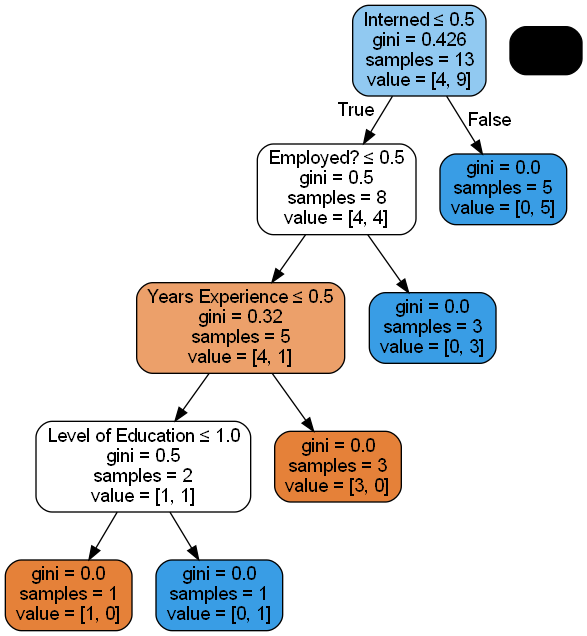

In [8]:
from IPython.display import Image  
from io import StringIO  
import pydotplus
from sklearn import tree

# Geração dos dados em formato DOT
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                     feature_names=features,  
                     filled=True, rounded=True,  
                     special_characters=True)  

# Converte os dados DOT para um gráfico
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# Exibe a imagem da árvore de decisão
Image(graph.create_png())  


## Ensemble learning: using a random forest
Usaremos uma floresta aleatória de 10 árvores de decisão para prever o emprego de perfis de candidatos específicos:

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Cria um classificador de Floresta Aleatória com 10 árvores (n_estimators=10)
clf = RandomForestClassifier(n_estimators=10)

# Treina o classificador usando os dados de entrada (X) e os rótulos (y)
clf = clf.fit(X, y)

# Cria um DataFrame para as previsões, garantindo que os nomes das características sejam os mesmos
# Para um empregado 10 anos de experiência, nível de educação PhD (2)
employed_10_years_phd = pd.DataFrame([[10, 1, 2, 0, 0, 0]], columns=features)

# Previsão: Prediz se o empregado será contratado
print(clf.predict(employed_10_years_phd))

# Para um desempregado com 10 anos de experiência, nível de educação MS (1)
unemployed_10_years_ms = pd.DataFrame([[10, 0, 1, 0, 0, 0]], columns=features)

# Previsão: Prediz se o desempregado será contratado
print(clf.predict(unemployed_10_years_ms))


[1]
[0]


## Activity
Modifique os dados de teste para criar um universo alternativo onde todos que eu contrato são todos que normalmente não contrataria e vice-versa. Compare a árvore de decisão resultante com aquela dos dados originais.

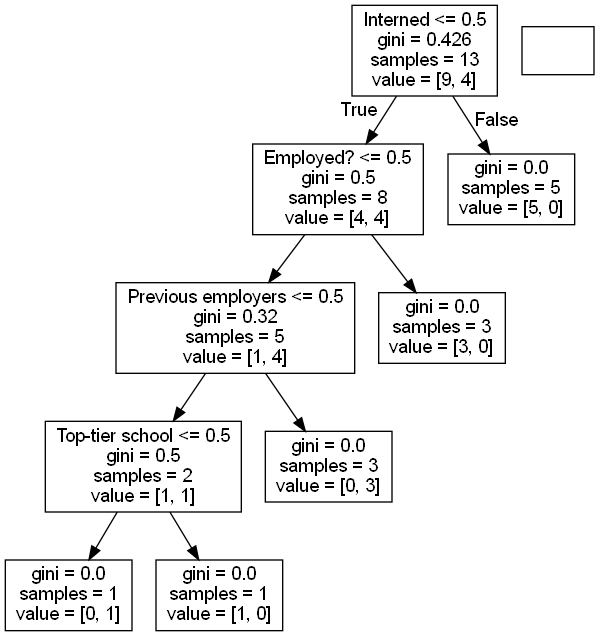

In [11]:
import pandas as pd
from sklearn import tree
from IPython.display import Image  
from io import StringIO  
import pydotplus

# Carregar o arquivo CSV
input_file = "PastHires.csv"
df = pd.read_csv(input_file, header=0)

# Mapear colunas relevantes
d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)

# Inverter os rótulos de 'Hired'
df['Hired'] = 1 - df['Hired']

# Treinar o modelo modificado
features = list(df.columns[:6])
y = df["Hired"]
X = df[features]

clf_modificado = tree.DecisionTreeClassifier()
clf_modificado = clf_modificado.fit(X, y)

# Visualizar a árvore de decisão modificada
dot_data_modificado = StringIO()  
tree.export_graphviz(clf_modificado, out_file=dot_data_modificado, feature_names=features)  
graph_modificado = pydotplus.graph_from_dot_data(dot_data_modificado.getvalue())  
Image(graph_modificado.create_png())  
